# Data augmentation

In [33]:
# Imports

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers

In [34]:
!ls screen_grab # 11-14_cap_hand_00001.jpg

11-14_cap_hand_00001.jpg 11-14_cap_hand_00156.jpg 11-14_cap_hand_00311.jpg
11-14_cap_hand_00002.jpg 11-14_cap_hand_00157.jpg 11-14_cap_hand_00312.jpg
11-14_cap_hand_00003.jpg 11-14_cap_hand_00158.jpg 11-14_cap_hand_00313.jpg
11-14_cap_hand_00004.jpg 11-14_cap_hand_00159.jpg 11-14_cap_hand_00314.jpg
11-14_cap_hand_00005.jpg 11-14_cap_hand_00160.jpg 11-14_cap_hand_00315.jpg
11-14_cap_hand_00006.jpg 11-14_cap_hand_00161.jpg 11-14_cap_hand_00316.jpg
11-14_cap_hand_00007.jpg 11-14_cap_hand_00162.jpg 11-14_cap_hand_00317.jpg
11-14_cap_hand_00008.jpg 11-14_cap_hand_00163.jpg 11-14_cap_hand_00318.jpg
11-14_cap_hand_00009.jpg 11-14_cap_hand_00164.jpg 11-14_cap_hand_00319.jpg
11-14_cap_hand_00010.jpg 11-14_cap_hand_00165.jpg 11-14_cap_hand_00320.jpg
11-14_cap_hand_00011.jpg 11-14_cap_hand_00166.jpg 11-14_cap_hand_00321.jpg
11-14_cap_hand_00012.jpg 11-14_cap_hand_00167.jpg 11-14_cap_hand_00322.jpg
11-14_cap_hand_00013.jpg 11-14_cap_hand_00168.jpg 11-14_cap_hand_00323.jpg
11-14_cap_hand_00014.jpg 

### Def

In [35]:
data_dir = './screen_grab/'

In [50]:
"""
tf.keras.preprocessing.image.load_img(
    path, grayscale=False, color_mode='rgb', target_size=None,
    interpolation='nearest')
"""

image = tf.keras.preprocessing.image.load_img('./screen_grab/11-14_cap_hand_00008.jpg')

In [51]:
type(image)

PIL.JpegImagePlugin.JpegImageFile

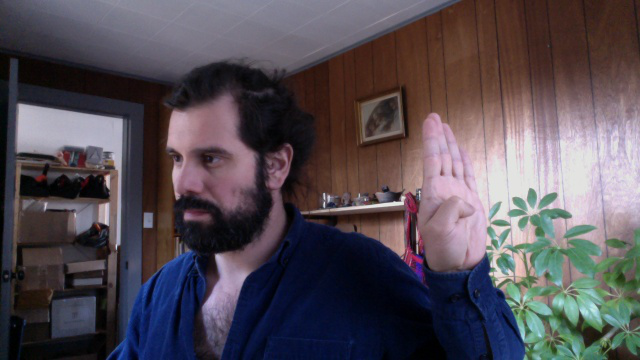

In [48]:
image

In [49]:
image

AttributeError: 'JpegImageFile' object has no attribute 'shape'

In [53]:
height = 412
width = 412

In [55]:
 tf.keras.layers.experimental.preprocessing.Resizing(
    height, width, interpolation='bilinear', name=None
)


In [68]:
IMG_SIZE = 412

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255)
])


In [69]:

input_arr = np.array(image) 
input_arr.shape

(360, 640, 3)

TensorShape([412, 412, 3])

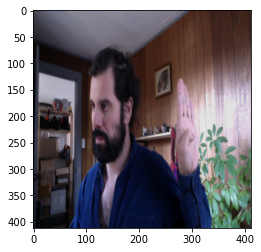

In [74]:
image_412 = resize_and_rescale(input_arr)
_ = plt.imshow(image_412)
result.shape

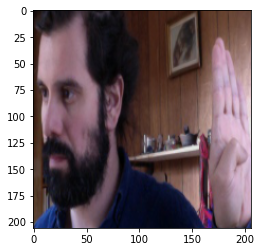

In [104]:
cropped = tf.image.central_crop(image_412, central_fraction=0.5)
plt.imshow(cropped)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


TensorShape([412, 412, 3])

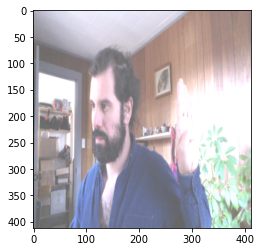

In [105]:
bright = tf.image.adjust_brightness(image_412, 0.4)
plt.imshow(bright)
bright.shape

In [107]:
image_412.shape

TensorShape([412, 412, 3])

TypeError: Invalid shape (412, 412, 1) for image data

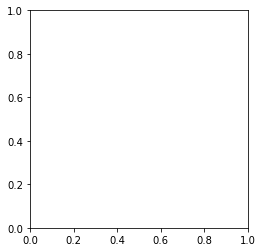

In [109]:
# color space needs to be 1
"""
grayscaled = tf.image.rgb_to_grayscale(tf_arr)
plt.imshow(grayscaled)
"""

#visualize(image, tf.squeeze(grayscaled))
#_ = plt.colorbar()


TensorShape([412, 412, 3])

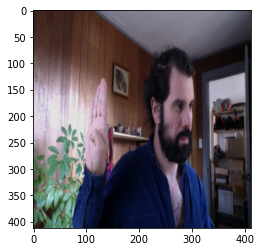

In [75]:
flipped = tf.image.flip_left_right(image_412)
plt.imshow(flipped)
flipped.shape

In [81]:
class RandomInvert(layers.Layer):
  def __init__(self, factor=0.5, **kwargs):
    super().__init__(**kwargs)
    self.factor = factor

  def call(self, x):
    return random_invert_img(x)


NameError: name 'x' is not defined

TypeError: Image data of dtype object cannot be converted to float

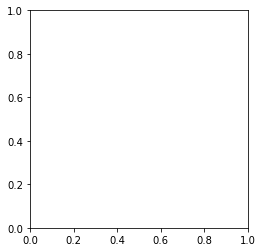

In [79]:
_ = plt.imshow(RandomInvert(image_412))


In [91]:
tf_arr = tf.keras.preprocessing.image.img_to_array(image_412)
tf_arr.shape

(412, 412, 3)

TypeError: Invalid shape (412, 412, 1) for image data

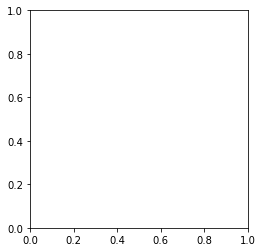

In [92]:
grayscaled = tf.image.rgb_to_grayscale(image_412)
plt.imshow(grayscaled)


In [89]:
crop  = tf.keras.layers.experimental.preprocessing.CenterCrop(
    33, 33, name=None
)

In [101]:
ds = tf.expand_dims(image_412, 3)
ds.shape

TensorShape([412, 412, 3, 1])

In [102]:

cropped_img = crop(image_412)

InvalidArgumentError: The crop width 33 should not be greater than input width.
Condition x >= 0 did not hold element-wise:
x (shape=() dtype=int32) = 
-30

In [39]:
input_arr = tf.keras.preprocessing.image.img_to_array(image)

In [40]:
type(input_arr)

numpy.ndarray

In [41]:
input_arr.shape

(360, 640, 3)

In [42]:
IMG_SIZE = 412

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  #layers.experimental.preprocessing.Rescaling(1./255)
])

In [56]:
resized_arr = resize_and_rescale(input_arr)

In [57]:
input_arr.shape

(360, 640, 3)

In [18]:
input_arr = np.array([input_arr])  # Convert single image to a batch.

In [19]:
input_arr.shape

(1, 360, 640, 3)

In [67]:
data_augmentation = tf.keras.Sequential([
  #layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [103]:


ds = tf.expand_dims(result, 0)
for i in range(5):
    augmented_image = data_augmentation(ds)  # needs 4D 


In [105]:
augmented_image.shape

TensorShape([1, 412, 412, 3])

In [133]:
result.shape

TensorShape([412, 412, 3])

In [101]:
new_image.shape

TensorShape([4])

TypeError: Invalid shape (4,) for image data

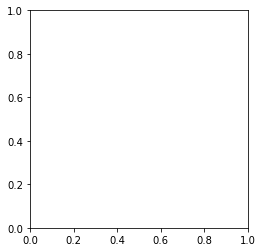

In [100]:
plt.imshow(new_image.numpy().astype("uint8"));


In [56]:
ds = tf.expand_dims(result, 0)
ds2 = tf.expand_dims(result, 1)

In [58]:
ds.shape

TensorShape([1, 412, 412, 3])

In [128]:
path = 'saved/new_image.jpg'

tf.keras.preprocessing.image.save_img(
    path, input_arr, data_format='channels_last', file_format=None, scale=True
)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


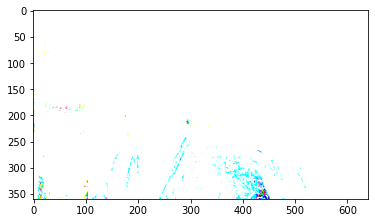

In [151]:
flipped = tf.image.flip_left_right(result)
plt.imshow(input_arr)



In [130]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


NameError: name 'cifar10' is not defined

In [129]:
tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False, samplewise_center=False,
    featurewise_std_normalization=False, samplewise_std_normalization=False,
    zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0,
    height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0,
    channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False,
    vertical_flip=False, rescale=None, preprocessing_function=None,
    data_format=None, validation_split=0.0, dtype=None
)


In [21]:
data_dir = 'screen_grab'

In [106]:
!ls

convert_class_of_txt.ipynb       screen_grab
data_augmentation.ipynb          screen_grab.ipynb
detect.ipynb                     untitled.txt
file_structure-yoloV4.ipynb      work_shopping_openCV.ipynb
learning-tf_keras-data_aug.ipynb


In [111]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                    rescale=1./255,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True)
            #test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        'screen_grab',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')


Found 0 images belonging to 1 classes.


In [22]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123)
"""
,

  image_size=(360, 640),
  batch_size=34)
"""

Found 0 files belonging to 1 classes.
Using 0 files for training.


TypeError: Input 'filename' of 'ReadFile' Op has type float32 that does not match expected type of string.

In [45]:
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255)
])


In [ ]:
result = resize_and_rescale(image)
_ = plt.imshow(result)
